# Page Rank and HITS

_Deadline: 16.04.2021 at 23:59_

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as netx

This lab will be playing with the algorithms Page Rank and HITS.

## Task 1

First, we shall look at our good friends from this karate club. Let us pick several values for coefficient $\alpha$ and see what we get.

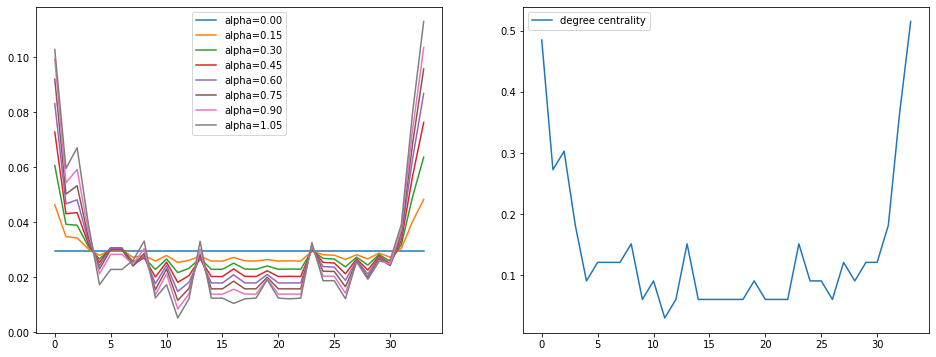

In [4]:
graph = netx.karate_club_graph()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for alpha in np.arange(0, 1.2, 0.15):
    page_rank = netx.pagerank(graph, alpha=alpha)
    ax1.plot(np.array(list(page_rank.values())), label='alpha={0:.2f}'.format(alpha))
ax1.legend()
ax2.plot(np.array(list(netx.degree_centrality(graph).values())), label='degree centrality')
ax2.legend()

a) How can you normalize degree centrality so that it sums up to 1? Do it and plot all these on the same plot.

If we want to normalize _something_, we just need to divide that _something_ by the sum of _everything_

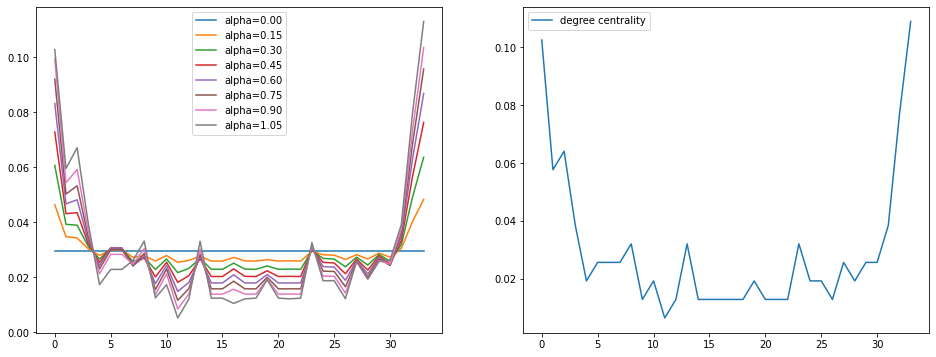

In [6]:
degree_centr_np = np.array(list(netx.degree_centrality(graph).values()))
norm_degree_centr = degree_centr_np / degree_centr_np.sum()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for alpha in np.arange(0, 1.2, 0.15):
    page_rank = netx.pagerank(graph, alpha=alpha)
    ax1.plot(np.array(list(page_rank.values())), label='alpha={0:.2f}'.format(alpha))
ax1.legend()
ax2.plot(norm_degree_centr, label='degree centrality')
ax2.legend()

_And this is where you explain what you see and why._

The graph itself does not change. Only values change

b) In order to see how fast it converges, we shall need to code our own Page Rank algorithm. Code a function ```mypagerank(G,alpha,k)``` which executes the power iteration $k$ times starting from the uniform distribution among nodes in the graph. It should return the list of page rank scores. Recall that
$$ \mathbf{p}^{t+1} = \alpha (D^{-1}A)^{\top}\mathbf{p} + (1-\alpha)\frac{\mathbf{e}}{n}, $$
where $A$ is the adjacency matrix of $G$ and $D$ is the diagonal matrix made of degrees of vertices.

In [ ]:
def mypagerank(G, alpha, k):
    adj = nx.linalg.graphmatrix.adjacency_matrix(G).toarray()
    p = np.random.rand(n, 1)
    p = p / np.linalg.norm(p, 1)
    M = (alpha * A + (1 - alpha) / n)
    
    for i in range(k):
        p = M @ p
    return p

Alright, let us see how it goes...

c) Plot the results after 0 up to 10 iterations.

In [ ]:
fig = plt.figure(1, figsize=(7,7))
ax = plt.subplot(111)    

its = np.arange(0,10, 1)

for it in its:
    pr = mypagerank(G, 0.85, it)
    prval = list(pr)
    ax.plot(prval, label='{:d} iteration(s)'.format(it))
    
ax.legend()

d) Pay attention to the order of colors. What do you observe? How can you explain it?

_Your answer..._

e) Plot Page Rank vs Degree Centrality for $\alpha$ in $\{0,0.5,1\}$.

In [ ]:
fig = plt.figure(1, figsize=(15,5))

d = nx.degree_centrality(G)
d = d.values()

ax = plt.subplot(131)    
pr = nx.pagerank(G, alpha=0)
pr = pr.values()
ax.plot(d, pr, '+')

ay = plt.subplot(132)    
pr = nx.pagerank(G, alpha=0.5)
pr = pr.values()
ay.plot(d, pr, '+')

az = plt.subplot(133)    
pr = nx.pagerank(G, alpha=1)
pr = pr.values()
az.plot(d, pr, '+')


## Task 2 

Experiment several teleportation vectors on the coappearance network of characters in the novel _Les Misérables_ (V. Hugo). The graph is in the file `lesmis.gml`. It was compiled by Donald Knuth [1]. Try to focus on several famous characters (Valjean, Javert, Gavroche, Cosette), or use betweenness centrality (is degree centrality of interest here?) for the teleportation. Each time, draw the network induced by nodes with high page rank. What can you observe?


[1] D. E. Knuth, _The Stanford GraphBase: A Platform for Combinatorial Computing_, Addison-Wesley, Reading, MA (1993).

In [7]:
!wget http://users.csc.calpoly.edu/~dekhtyar/466-Fall2010/labs/lab7/lesmis.gml

--2021-04-16 18:20:53--  http://users.csc.calpoly.edu/~dekhtyar/466-Fall2010/labs/lab7/lesmis.gml
Resolving users.csc.calpoly.edu (users.csc.calpoly.edu)... 129.65.128.20
Connecting to users.csc.calpoly.edu (users.csc.calpoly.edu)|129.65.128.20|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17610 (17K)
Saving to: ‘lesmis.gml’

lesmis.gml          100%[===================>]  17.20K  --.-KB/s    in 0.08s   

2021-04-16 18:20:53 (212 KB/s) - ‘lesmis.gml’ saved [17610/17610]



In [57]:
graph = netx.read_gml('lesmis.gml')
pers = netx.betweenness_centrality(graph)
page_rank_values = netx.algorithms.link_analysis.pagerank_alg.pagerank(graph, personalization=pers)

In [75]:
# Choose popular nodes (which values > a)
def sub_graph(G, prv, a):
    sub_nodes = [key for key, value in prv.items() if value > a]
    return netx.Graph.subgraph(G, nodes=sub_nodes)

def plot_sub_graph(G):
    plt.figure(figsize=(15, 10))
    spr_layout = netx.spring_layout(G)

    netx.draw_networkx_edges(
        G,
        spr_layout,
        alpha=0.2,
        edge_color='green'
    )
    netx.draw_networkx_nodes(
        G,
        pos=spr_layout,
        node_color='blue',
        node_size=60,
    )
    netx.draw_networkx_labels(
        G,
        pos=spr_layout,
        labels={node_name: node_name for node_name in G.nodes()},
        font_size=15,
        font_color='red'
    )

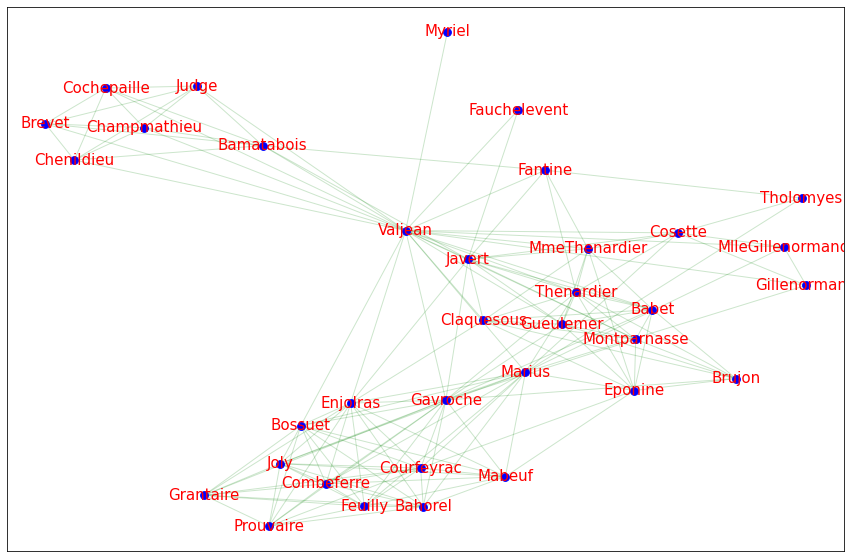

In [76]:
plot_sub_graph(sub_graph(graph, page_rank_values, 0.01))

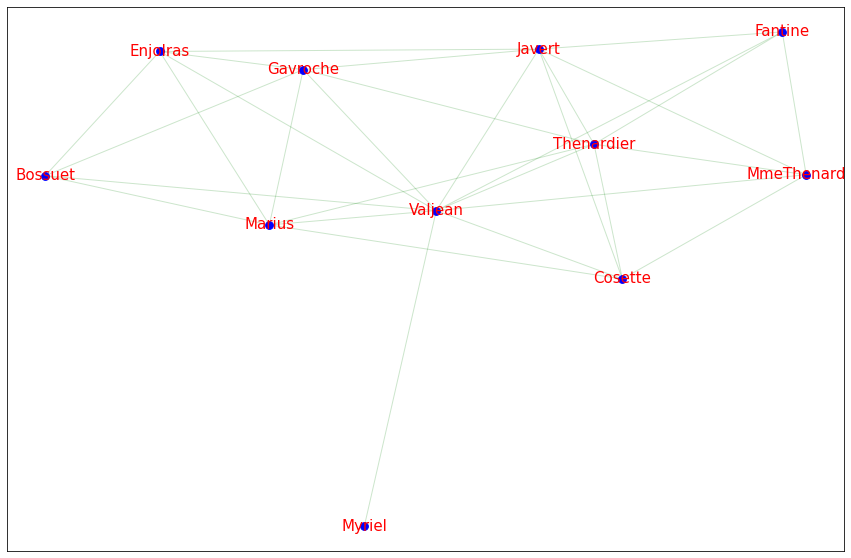

In [77]:
plot_sub_graph(sub_graph(graph, page_rank_values, 0.02))

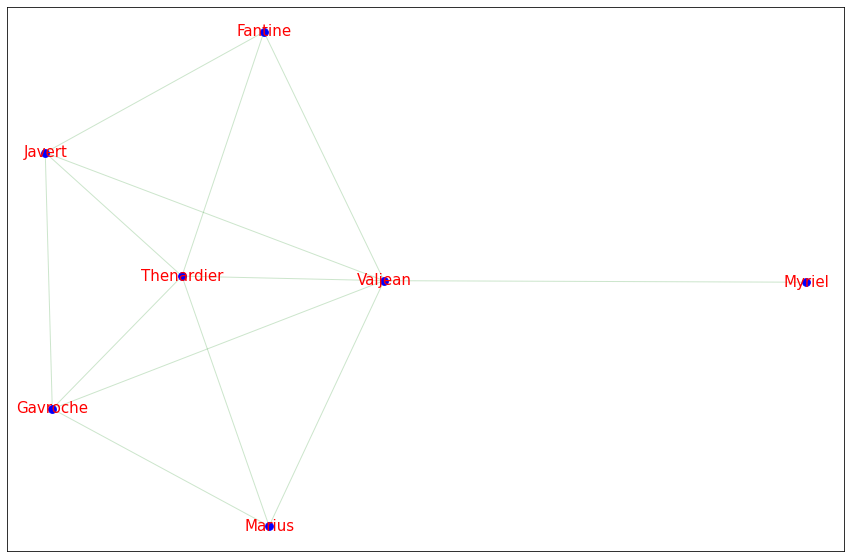

In [86]:
plot_sub_graph(sub_graph(graph, page_rank_values, 0.03))

## Task 3

Let us now focus on larger networks. First let us read the network of political blogs.

In [81]:
#Some arcs are multi and it prevents some algorithms to work. We thus simplify it.

G = netx.read_gml('polblogs.gml')
A = netx.adjacency_matrix(G)
M = A.astype(bool).astype(int) #converts non-zero entries to True and then True to 1.
H = netx.DiGraph(M)
L = list(G)
mapping={}
for i in range(len(L)):
    mapping[i]=L[i]
Gsimp=netx.relabel_nodes(H,mapping) #relabel vertices with original names.

Run the HITS algorithm on `Gsimp` and plot the hubs score against the authorities score.

In [83]:
(h, a) = netx.hits(Gsimp)

Text(0, 0.5, 'Auth')

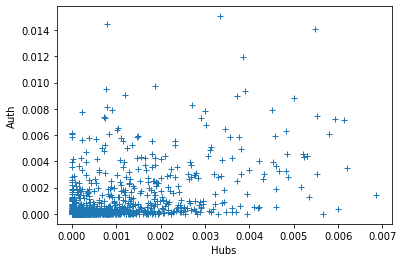

In [84]:
la = list(a.values())
lh = list(h.values())
plt.plot(lh,la, '+')
plt.xlabel('Hubs')
plt.ylabel('Auth')

Vizualize top Authorities colored in blue with sizes proportional to A-value and their common Hubs coloured in green with size proportional to H-value.

In [87]:
def get_sub(arr, a):
    KS = 40000
    values = {key: value for key, value in arr.items() if value >= a}
    labels = {node: node for node in Gsimp.nodes() if node in values}
    sizes = [KS * values[node] for node in Gsimp.nodes() if node in values]

    return labels, sizes

In [97]:
authority_labels, authority_sizes = get_sub(a, 0.007)

In [98]:
hubs_labels, hubs_sizes = get_sub(h, 0.005)

In [99]:
edges = [i for i in netx.algorithms.boundary.edge_boundary(Gsimp, hubs_labels, authority_labels)]

{'anoldsoul.blogspot.com': Text(-0.12871494889259338, -0.07337725162506104, 'anoldsoul.blogspot.com'),
 'atrios.blogspot.com': Text(-0.04082871600985527, -0.019654501229524612, 'atrios.blogspot.com'),
 'atrios.blogspot.com/ ': Text(-0.03955933079123497, -0.020705226808786392, 'atrios.blogspot.com/ '),
 'bodyandsoul.typepad.com': Text(-0.1269576996564865, 0.0007771318196319044, 'bodyandsoul.typepad.com'),
 'busybusybusy.com': Text(-0.07060910016298294, 0.11503913253545761, 'busybusybusy.com'),
 'corrente.blogspot.com': Text(-0.09593779593706131, 0.047945261001586914, 'corrente.blogspot.com'),
 'digbysblog.blogspot.com': Text(7.785458728903905e-05, 0.09043243527412415, 'digbysblog.blogspot.com'),
 'elayneriggs.blogspot.com': Text(-0.08880195021629333, -0.09903046488761902, 'elayneriggs.blogspot.com'),
 'liberaloasis.com': Text(-0.060893524438142776, -0.02088339254260063, 'liberaloasis.com'),
 'madkane.com/notable.html': Text(-0.07577979564666748, -0.024738585576415062, 'madkane.com/notab

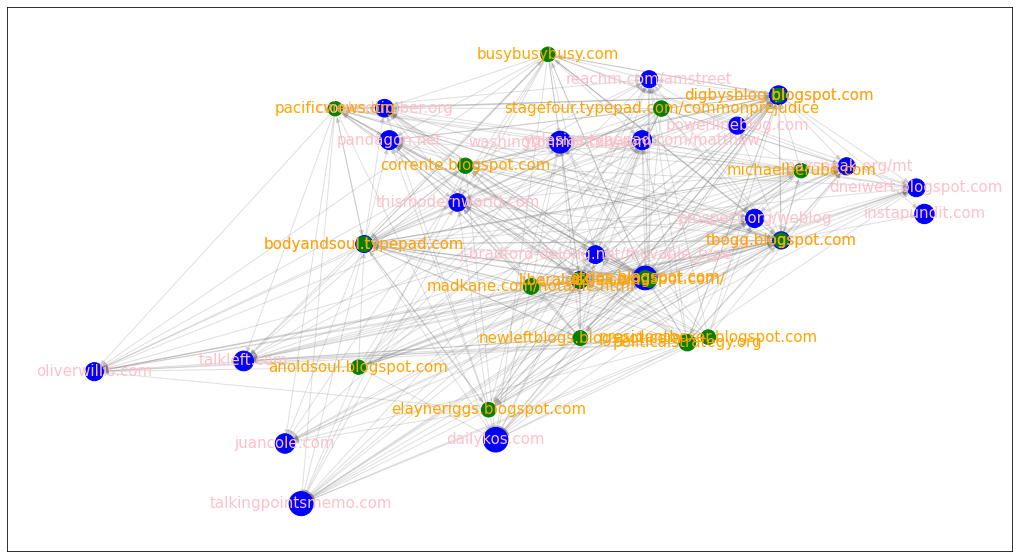

In [100]:
plt.figure(figsize=(18, 10))  
spr_layout = netx.spring_layout(Gsimp)
netx.draw_networkx_edges(
    Gsimp,
    spr_layout,
    edgelist=edges,
    alpha=0.25,
    edge_color='grey'
)
netx.draw_networkx_nodes(
    Gsimp,
    nodelist=authority_labels,
    pos=spr_layout,
    node_color='blue',
    node_size=authority_sizes
)
netx.draw_networkx_labels(
    Gsimp,
    spr_layout,
    authority_labels,
    font_size=15,
    font_color='pink'
)
netx.draw_networkx_nodes(
    Gsimp,
    nodelist=hubs_labels,
    pos=spr_layout,
    node_color='green',
    node_size=hubs_sizes
)
netx.draw_networkx_labels(
    Gsimp,
    spr_layout,
    hubs_labels,
    font_size=15,
    font_color='orange'
)